In [59]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import re
import datetime as dt

# # visualization
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# Writing multiple dataframes to worksheets using Pandas and XlsxWriter
import xlsxwriter
import glob

# !pip install xlsxwriter
# !pip install glob

In [60]:
xls = pd.ExcelFile(r'C:\Users\u1-510\Desktop\Python\Untitled Folder\Analysis_Сonversion.xlsx')
df = pd.read_excel(xls, 'Segment')

In [3]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [4]:
df = df.query("(Geo=='KZ') | (Geo=='RU') | (Geo=='UA')")

In [5]:
df = df.query("Network=='Видео на YouTube'")

In [6]:
# Только номер креатива
df['Creo_group'] = df['Creo'].str.split('(\d+)([A-Za-z]+)', expand=True).loc[:,[1]]

In [7]:
def ftd_target(el):
    if el > 0:
        return 1
    else:
        return 0

In [8]:
df['Target'] = df['FTD'].map(ftd_target)

<AxesSubplot:>

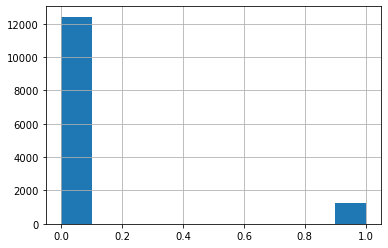

In [9]:
df['Target'].hist()

In [10]:
df.Target.value_counts().reset_index()

,index,Target
0,0,12419
1,1,1261


In [11]:
tgt_train = df.copy()

In [12]:
tgt_train['Campaign'] = tgt_train['ADS'].astype(str) + ' ' +  tgt_train['Camp'].astype(str) + ' ' + tgt_train['Ad_group'].astype(str) + ' ' + tgt_train['Date'].astype(str)

In [13]:
tgt_train = tgt_train.reset_index(drop=True)

In [14]:
# # Словарь класификации
# codes_cats = tgt_train.Campaign.astype('category')
# dict_cats = dict(enumerate(codes_cats.cat.categories))

In [15]:
# # Присвоенные cat.codes
# tgt_train['ID'] = tgt_train.Campaign.astype('category').cat.codes

# # Розшифровка
# #df_group['level_back'] = df_group['ID'].map(dict_cats)

In [16]:
tgt_train.columns

Index(['Geo', 'Network', 'Optimization', 'Creo', 'Brand',
       'Ad_group_target_CPA', 'ADS', 'Camp', 'Ad_group', 'App', 'Date',
       'Cost_USD', 'Cost', 'Show', 'Clicks', 'Install', 'Firstopen',
       'Registration', 'FTD', 'CPM', 'CPM_segment', 'CPC', 'CPC_segment',
       'Inst_cost', 'Inst_cost_segment', 'Inst_cost_segment_AU_DE',
       'Open_cost', 'Open_cost_segment', 'Open_cost_segment_AU_DE', 'Reg_cost',
       'Reg_cost_segment', 'Reg_cost_segment_AU_DE', 'FTD_cost', 'CTR',
       'CTR_cost_segment', 'CR_click_inst', 'CR_click_inst_segment',
       'CR_inst_open', 'CR_inst_open_segment', 'CR_open_reg',
       'CR_open_reg_segment', 'CR_reg_ftd', 'CR_reg_ftd_segment',
       'CPA_segment', 'Creo_group', 'Target', 'Campaign'],
      dtype='object')

In [17]:
tgt_train.drop(['Geo', 'Network', 'Optimization', 'Creo', 'Brand', 'App', 'Date', 'ADS', 'Camp', 'Ad_group',
       'Ad_group_target_CPA', 'Cost_USD', 'Cost', 'Show', 'Clicks', 'Install', 'Firstopen',
       'Registration', 'FTD', 'Inst_cost_segment_AU_DE', 'Open_cost_segment_AU_DE', 
                'Reg_cost_segment_AU_DE', 'FTD_cost', 'CR_reg_ftd', 'CR_reg_ftd_segment', 'Campaign', 'CPA_segment'], axis=1, inplace=True)

In [18]:
tgt_train.columns

Index(['CPM', 'CPM_segment', 'CPC', 'CPC_segment', 'Inst_cost',
       'Inst_cost_segment', 'Open_cost', 'Open_cost_segment', 'Reg_cost',
       'Reg_cost_segment', 'CTR', 'CTR_cost_segment', 'CR_click_inst',
       'CR_click_inst_segment', 'CR_inst_open', 'CR_inst_open_segment',
       'CR_open_reg', 'CR_open_reg_segment', 'Creo_group', 'Target'],
      dtype='object')

In [19]:
tgt_train.CR_inst_open.describe()

count    13680.000000
mean         0.810386
std          1.176064
min          0.000000
25%          0.000000
50%          0.000000
75%          1.400000
max         25.000000
Name: CR_inst_open, dtype: float64

In [20]:
tgt_train.Reg_cost.describe()

count    13680.000000
mean         2.123319
std          4.937910
min          0.000000
25%          0.000000
50%          0.000000
75%          2.510000
max        161.710000
Name: Reg_cost, dtype: float64

In [21]:
tgt_train.Inst_cost.describe()

count    13680.000000
mean         0.756950
std          1.234538
min          0.000000
25%          0.000000
50%          0.240000
75%          1.140000
max         23.450000
Name: Inst_cost, dtype: float64

## Categorical variable encoding

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
cat = ['CPM_segment', 'CPC_segment', 'Inst_cost_segment',  'Open_cost_segment',  'Reg_cost_segment', 
                       'CTR_cost_segment', 'CR_click_inst_segment',  'CR_inst_open_segment', 'CR_open_reg_segment']

In [24]:
x_cat = pd.get_dummies(tgt_train[cat])

## Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
attrs_num = ['CPM', 'CPC', 'CTR', 'Inst_cost', 'Open_cost', 'Reg_cost', 'CR_click_inst', 'CR_inst_open', 'CR_open_reg']
scl = StandardScaler()
x_num = pd.DataFrame(scl.fit_transform(tgt_train[attrs_num]), columns=attrs_num)

In [26]:
train_data = pd.concat([tgt_train[['Target']], x_num], axis=1)

In [27]:
# train_data = tgt_train[['Target', 'CPM', 'CPC', 'CTR', 'Inst_cost', 'Open_cost', 'Reg_cost', 'CR_click_inst', 'CR_inst_open', 'CR_open_reg']]

## Modeling

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb
from lofo import LOFOImportance, Dataset, plot_importance # to install !pip install lofo-importance
%matplotlib inline
from sklearn.metrics import make_scorer, mean_absolute_error, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV, cross_val_score
import itertools
import optuna

C:\Users\u1-510\Anaconda3\lib\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score , accuracy_score, precision_score

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# test_df = train_data.sample(n=199, random_state=7)
# id_test = test_df['ID']
# train = train_data.query("ID not in @id_test")

X = train_data.drop("Target",axis=1)
y = train_data['Target']

print(X.shape, y.shape, train_data.shape)

(13680, 9) (13680,) (13680, 10)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .3,
                                                    random_state = 31,
                                                    stratify = y)

In [33]:
model = XGBClassifier(n_estimators=1000, learning_rate=0.11, max_depth = 5)

In [34]:
#Using kfold cross validation
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(shuffle=True, random_state=42, n_splits=3)
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])

In [35]:
from xgboost.sklearn import XGBClassifier

new_model =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.10, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=1000, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

new_model.fit(X_train,y_train)
predict_12=new_model.predict(X_test)

[11:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [36]:
print(accuracy_score(y_test,predict_12))
print(confusion_matrix(y_test,predict_12))
print(classification_report(y_test,predict_12))

0.9087719298245615
[[4028  118]
 [ 298  116]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4146
           1       0.50      0.28      0.36       414

    accuracy                           0.91      4560
   macro avg       0.71      0.63      0.65      4560
weighted avg       0.89      0.91      0.90      4560



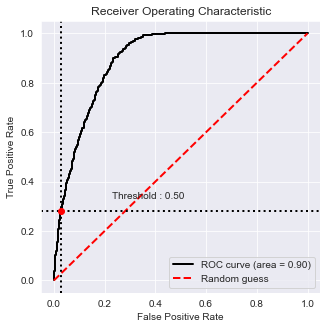

In [37]:
# Use predict_proba to predict probability of the class
y_pred = new_model.predict_proba(X_test)[:,1]

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [38]:
results=pd.DataFrame()
results['columns']=X.columns
results['importances'] = new_model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:20]

,columns,importances
8,CR_open_reg,0.335358
5,Reg_cost,0.152043
7,CR_inst_open,0.093659
6,CR_click_inst,0.076554
2,CTR,0.074069
4,Open_cost,0.071553
0,CPM,0.067129
3,Inst_cost,0.064932
1,CPC,0.064703


In [40]:
new_model2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.12, max_delta_step=0,
              max_depth=5, min_child_weight=7,
              monotone_constraints='()', n_estimators=600, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None, nthread=4, eval_metric='logloss')

new_model2.fit(X_train,y_train)
predict_12=new_model2.predict(X_test)

C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [41]:
print(accuracy_score(y_test,predict_12))
print(confusion_matrix(y_test,predict_12))
print(classification_report(y_test,predict_12))

0.9089912280701754
[[4017  129]
 [ 286  128]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4146
           1       0.50      0.31      0.38       414

    accuracy                           0.91      4560
   macro avg       0.72      0.64      0.67      4560
weighted avg       0.89      0.91      0.90      4560



In [46]:
new_mode3 = XGBClassifier(base_score=0.4, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.016, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.121, max_delta_step=0,
              max_depth=5, min_child_weight=7,
              monotone_constraints='()', n_estimators=600, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None, nthread=4, eval_metric='logloss')

new_mode3.fit(X_train,y_train)
predict_12=new_mode3.predict(X_test)

C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [47]:
print(accuracy_score(y_test,predict_12))
print(confusion_matrix(y_test,predict_12))
print(classification_report(y_test,predict_12))

0.9098684210526315
[[4022  124]
 [ 287  127]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4146
           1       0.51      0.31      0.38       414

    accuracy                           0.91      4560
   macro avg       0.72      0.64      0.67      4560
weighted avg       0.89      0.91      0.90      4560



In [55]:
new_mode3.fit(X, y)

C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.4, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.016, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.121, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=6, nthread=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [58]:
# # save in JSON format
new_mode3.save_model("model_sklearn.json")